# Principal Component Analysis - Exercise

## GOAL: Identify the most differentiated handwritten digits using PCA.

You're developing an image recognition system for a postal service to automatically read handwritten digits, which is often more accurate than human recognition. The manager wants to know which digits are hardest to distinguish, so they can gather more labeled examples. Using a famous dataset of handwritten digits, you'll apply PCA to analyze which numbers are easily separable.

#### Data Set Information

The digit database contains 250 samples from 44 writers. Samples from 30 writers are used for training and cross-validation, while those from 14 are used for writer-independent testing. This database is available in UNIPEN format.

Handwriting samples are collected using a WACOM PL-100V pressure-sensitive tablet with an integrated LCD display. The tablet connects to an Intel 486 PC and records $x$ and $y$ coordinates along with pressure levels at a 100 ms sampling rate.

Writers are instructed to write 250 digits in random order within 500x500 pixel boxes. They are monitored only during the initial screens, where five boxes with the digits are displayed. Mistakes can be cleared with an on-screen button. The first ten digits are ignored to accommodate writers unfamiliar with the device.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

## Complete the Tasks in bold below

**TASK: Run the cells below to import the libraries and relevant data set.**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
digits = pd.read_csv('digits.csv')

In [33]:
#CODE HERE
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


**TASK: Create a new DataFrame called *pixels* that consists only of the pixel feature values by dropping the number_label column.**

In [34]:
#CODE HERE
pixels = digits.drop("number_label", axis=1)

In [35]:
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Displaying an Image

**TASK: Grab a single image row representation by getting the first row of the pixels DataFrame.**

In [36]:
#CODE HERE
single_image = pixels.iloc[0]

In [37]:
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

**TASK: Convert this single row Series into a numpy array.**

In [38]:
#CODE HERE
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**TASK: Reshape this numpy array into an (8,8) array.**

In [39]:
single_image.to_numpy().shape

(64,)

In [40]:
#CODE HERE
single_image  = single_image.to_numpy().reshape(8, 8)

**TASK: Use Matplotlib or Seaborn to display the array as an image representation of the number drawn. Remember your palette or cmap choice would change the colors, but not the actual pixel values.**

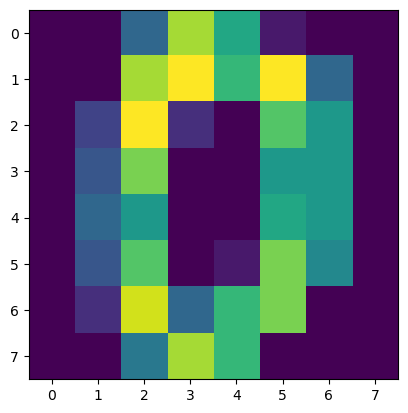

In [41]:
#CODE HERE
plt.imshow(single_image)

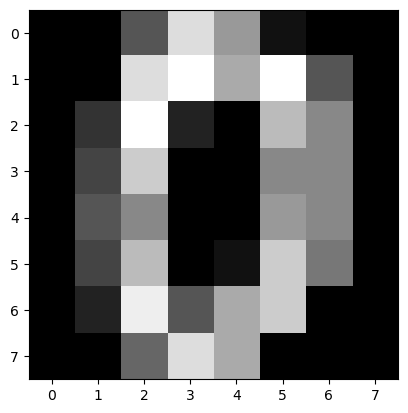

In [42]:
#CODE HERE
plt.imshow(single_image, cmap='gray')

<Axes: >

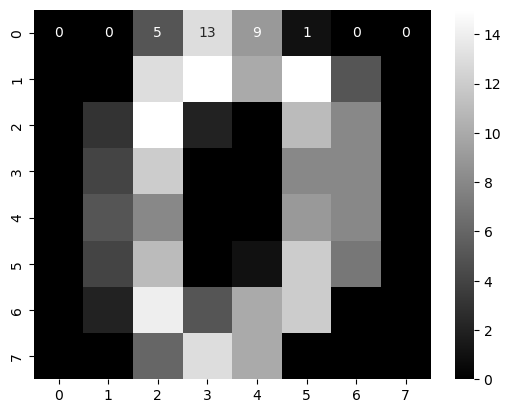

In [44]:
#CODE HERE
sns.heatmap(single_image, annot=True, cmap='gray')

Now let's move on to PCA.

## Scaling Data

**TASK: Use Scikit-Learn to scale the pixel feature dataframe.**

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [48]:
#CODE HERE
scaled_pixels = scaler.fit_transform(pixels)

In [49]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## PCA

**TASK: Perform PCA on the scaled pixel data set with 2 components.**

In [50]:
from sklearn.decomposition import PCA

In [60]:
#CODE HERE
pca_model = PCA(n_components=2)

In [61]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

**TASK: How much variance is explained by 2 principal components.**

In [62]:
#CODE HERE
pca_model.explained_variance_

array([7.34477606, 5.83549052])

**TASK: Create a scatterplot of the digits in the 2 dimensional PCA space, color/label based on the original number_label column in the original dataset.**

In [64]:
#CODE HERE
plt.scatter(pixels[:, 0], pixels[:, 1])

InvalidIndexError: (slice(None, None, None), 0)

**TASK: Which numbers are the most "distinct"?**

In [31]:
# Answer

## Bonus Challenge

**TASK: Create an "interactive" 3D plot of the result of PCA with 3 principal components. Lot's of ways to do this, including different libraries like plotly or bokeh, but you can actually do this just with Matplotlib and Jupyter Notebook. Search Google and StackOverflow if you get stuck, lots of solutions are posted online.**

In [33]:
from sklearn.decomposition import PCA

In [34]:
#CODE HERE

In [35]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [36]:
from mpl_toolkits import mplot3d

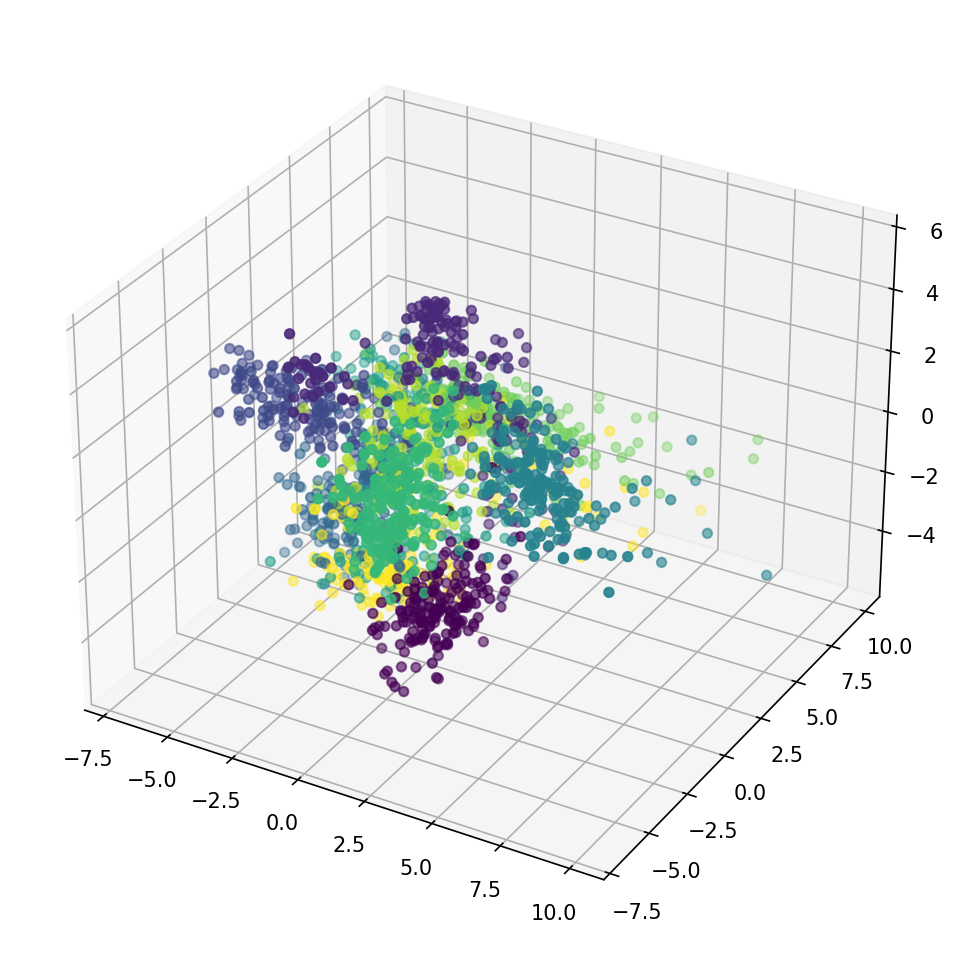

In [37]:
plt.figure(figsize=(8,8),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);

In [38]:
%matplotlib notebook

<IPython.core.display.Javascript object>


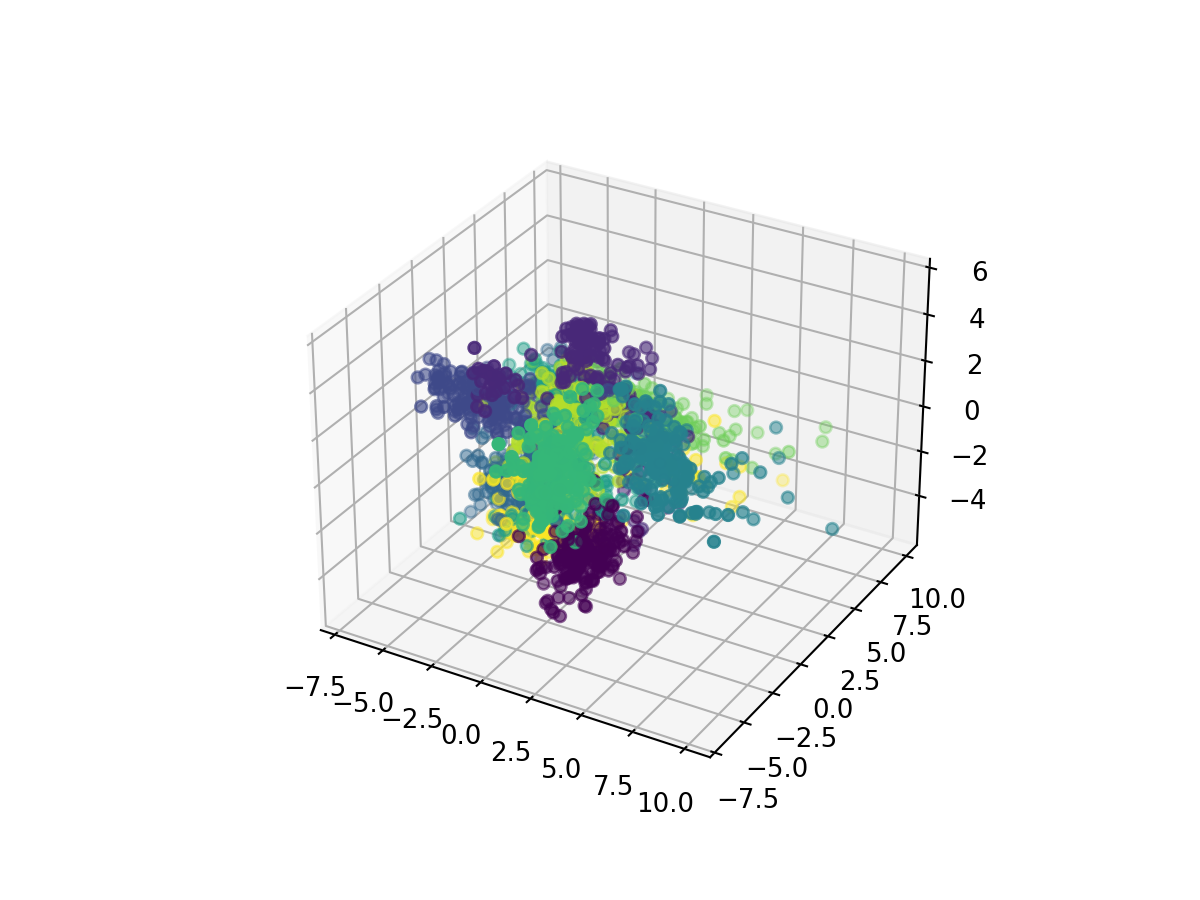

In [39]:
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);